In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  #mountingb

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/shipping'

/content/gdrive/MyDrive/shipping


In [ ]:
ls

global_shipping.zip


In [ ]:
!unzip global_shipping.zip

Archive:  global_shipping.zip
   creating: global_shipping/
  inflating: global_shipping/ports.csv  
  inflating: __MACOSX/global_shipping/._ports.csv  
  inflating: global_shipping/routes.csv  
  inflating: __MACOSX/global_shipping/._routes.csv  
  inflating: global_shipping/distances.csv  
  inflating: __MACOSX/global_shipping/._distances.csv  
   creating: global_shipping/.ipynb_checkpoints/
  inflating: global_shipping/ports and routes.ipynb  
  inflating: global_shipping/.ipynb_checkpoints/ports and routes-checkpoint.ipynb  


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cd global_shipping

/content/gdrive/My Drive/shipping/global_shipping


In [ ]:
Routes=pd.read_csv('routes.csv')
Ports=pd.read_csv('ports.csv')
# Distance=pd.read_csv('distances.csv')

In [20]:
Routes=Routes.drop('Unnamed: 0',axis=1)#.drop_duplicates()

In [25]:
first=Routes.drop_duplicates(['prev_port','next_port'],keep='first')
last=Routes.drop_duplicates(['prev_port','next_port'],keep='last')

In [33]:
total=pd.concat([first,last],axis=0)

In [39]:
Routes_total=total.sort_values(by=['prev_port','next_port']).reset_index().drop('index',axis=1)

In [247]:
Routes_total['lat']=round(Routes_total['lat'],2)
Routes_total['lon']=round(Routes_total['lon'],2)

In [210]:
Ports=pd.read_csv('ports.csv')
Ports=Ports.drop(['Unnamed: 0','INDEX_NO'],axis=1)

In [211]:
Ports=Ports.drop_duplicates().dropna().reset_index().drop('index',axis=1)

In [213]:
Ports['coords']=Ports['coords'].str.replace("(","")
Ports['coords']=Ports['coords'].str.replace(")","")

In [219]:
Ports['coords']=Ports['coords'].str[:-1]

In [236]:
cord=Ports['coords'].str.split(',',expand=True)

In [237]:
cord[0]=cord[0].astype(float)
cord[1]=cord[1].astype(float)

In [238]:
cord[0]=round(cord[0],2)
cord[1]=round(cord[1],2)

In [240]:
Ports['lat']=cord[0]
Ports['lon']=cord[1]

In [242]:
Ports=Ports.drop('coords',axis=1)

In [248]:
Ports.head(2)

,PORT_NAME,lat,lon
0,Terminal Pesquero Cta. Quiane,-70.32,-18.51
1,Oil Berth,-61.87,17.15


In [264]:
Routes_total.head(10)

,trip_count,prev_port,next_port,lat,lon,frequency
0,703167,26,1940,48.40,-123.33,0.200000
1,1806381,26,1940,36.11,120.22,0.800000
2,1121872,26,1973,48.40,-123.33,0.900000
3,1121874,26,1973,1.43,104.08,0.100000
4,120059,26,1975,48.40,-123.33,0.333333
5,2274155,26,1975,1.31,104.03,0.666667
6,1011280,26,2005,48.40,-123.33,0.875000
7,2236704,26,2005,31.22,122.05,0.125000
8,95483,26,2403,48.40,-123.33,0.500000
9,422281,26,2403,35.60,139.80,0.500000


In [265]:
Routes_ports=Ports.merge(Routes,on=['lat','lon'],how='right')

In [266]:
Routes_ports.head(2)

,PORT_NAME,lat,lon,trip_count,prev_port,next_port,frequency
0,NaN,45.76,-87.05,1984063,4410,3658,1.0
1,NaN,45.76,-87.05,1984078,3658,4410,1.0


In [268]:
Distance=pd.read_csv('distances.csv')
Distance=Distance.drop(['Unnamed: 0','trip_count','frequency'],axis=1).drop_duplicates().reset_index().drop('index',axis=1)

In [269]:
final=Routes_ports.merge(Distance,on=['prev_port','next_port'],how='left').reset_index().drop('index',axis=1)

In [271]:
final=final.drop_duplicates().reset_index().drop('index',axis=1)

In [282]:
final1=final.dropna().reset_index().drop('index',axis=1)

In [286]:
from google.colab import files

In [291]:
final1.to_csv('data.csv')

In [288]:
#final.to_csv('final_data.csv',index=False)

In [292]:
files.download('data.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [294]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 7.5MB/s 
     |████████████████████████████████| 14.8MB 235kB/s 
     |████████████████████████████████| 6.5MB 41.9MB/s 


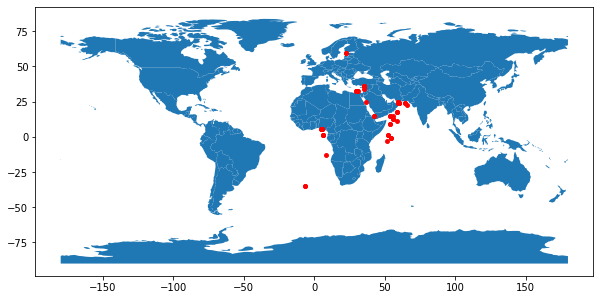

In [297]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(final1['lon'], final1['lat'])]
gdf = GeoDataFrame(final1, geometry=geometry)   
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);